In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv("https://gist.githubusercontent.com/stoicsapien1/72729ffbcd4b75b7bedd4b01b65bc9b5/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv")

In [48]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [49]:
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})


In [50]:
df

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801
...,...,...,...
9995,1,66.172652,136.777454
9996,1,67.067155,170.867906
9997,1,63.867992,128.475319
9998,1,69.034243,163.852461


<Axes: >

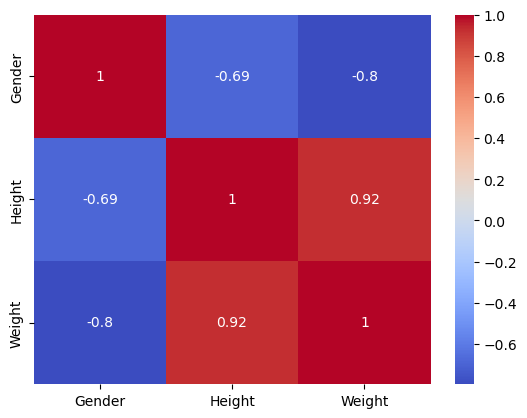

In [51]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [53]:
from sklearn.model_selection import train_test_split


In [54]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [55]:
X

,Gender,Height
0,0,73.847017
1,0,68.781904
2,0,74.110105
3,0,71.730978
4,0,69.881796
...,...,...
9995,1,66.172652
9996,1,67.067155
9997,1,63.867992
9998,1,69.034243


In [56]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [58]:
lr.fit(X_train,y_train)

LinearRegression()

In [59]:
X_test

,Gender,Height
6252,1,68.687232
4684,0,68.829334
1731,0,66.398128
4742,0,71.929340
4521,0,67.042903
...,...,...
4862,0,70.534667
7025,1,65.873106
7647,1,60.646988
7161,1,67.122422


In [60]:
y_test

6252    173.115813
4684    195.162042
1731    170.217451
4742    215.049660
4521    182.721452
           ...    
4862    203.763292
7025    155.915544
7647    123.862430
7161    165.324899
73      163.108002
Name: Weight, Length: 2500, dtype: float64

In [61]:
y_pred=lr.predict(X_test)

In [62]:
y_pred

array([165.57063635, 185.78881695, 171.26964188, ..., 117.55424148,
       156.22557983, 178.41897264])

In [63]:
m=lr.coef_

In [64]:
m

array([-19.36954901,   5.97200677])

In [68]:
X_test["ypred"]=y_pred

In [69]:
X_test

,Gender,Height,ypred
6252,1,68.687232,165.570636
4684,0,68.829334,185.788817
1731,0,66.398128,171.269642
4742,0,71.929340,204.302076
4521,0,67.042903,175.120240
...,...,...,...
4862,0,70.534667,195.973080
7025,1,65.873106,148.764658
7647,1,60.646988,117.554241
7161,1,67.122422,156.225580


In [70]:
X_test["y_test"]=y_test

In [71]:
X_test

,Gender,Height,ypred,y_test
6252,1,68.687232,165.570636,173.115813
4684,0,68.829334,185.788817,195.162042
1731,0,66.398128,171.269642,170.217451
4742,0,71.929340,204.302076,215.049660
4521,0,67.042903,175.120240,182.721452
...,...,...,...,...
4862,0,70.534667,195.973080,203.763292
7025,1,65.873106,148.764658,155.915544
7647,1,60.646988,117.554241,123.862430
7161,1,67.122422,156.225580,165.324899


In [72]:
lr.predict([[0,74]])

C:\Users\lucius seneca\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([216.66807065])

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [75]:
r2_score(y_test,y_pred)

0.9026809109766419

In [76]:
mean_absolute_error(y_test,y_pred)

7.993905209333191

In [77]:
mean_squared_error(y_test,y_pred)

101.86825136044213

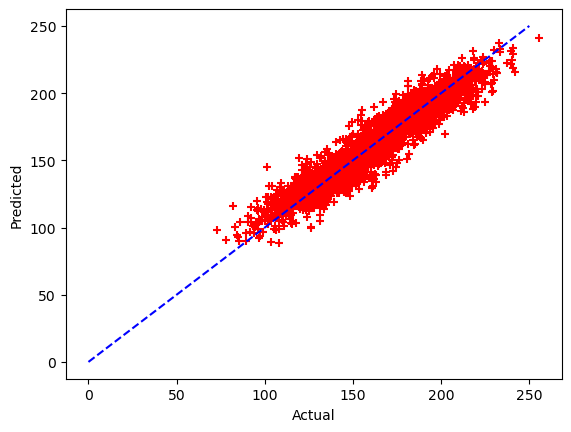

In [84]:
plt.scatter(y_test,y_pred,marker="+",color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([0, 250], [0, 250], color='blue', linestyle='--', label='y=x')